In [1]:
# plot global stats

# input file locations:
wd = '/lustre/scratch2/turquoise/mpeterse/runs'
dirName1 = 'c70u'
dirName2 = 'c70w'
fileName = 'analysis_members/globalStats.0001-01-01_00.00.00.nc'

# output file location, for plots:
writeOutput = True
outputDir='figures'

# Variables: single lines
varList = ['kineticEnergyCellMax', 'kineticEnergyCellAvg',
           'temperatureMax','salinityMax',
           'temperatureAvg','salinityAvg',
           'temperatureMin','salinityMin']
# Variables: plot min, average, and max
varListMinMax = ['temperature','salinity']

# title and labels
titleText = ''
xLabel = 'time, days runs:'+dirName1+','+dirName2
legend1="ocean/develop"
legend2="fully split FCT"
endTime = 220

# line types:
lt = '-:'

Reading data from: /lustre/scratch2/turquoise/mpeterse/runs/c70u/analysis_members/globalStats.0001-01-01_00.00.00.nc
Reading data from: /lustre/scratch2/turquoise/mpeterse/runs/c70w/analysis_members/globalStats.0001-01-01_00.00.00.nc
Created plot: figures/c70u_c70w_global_stats.png


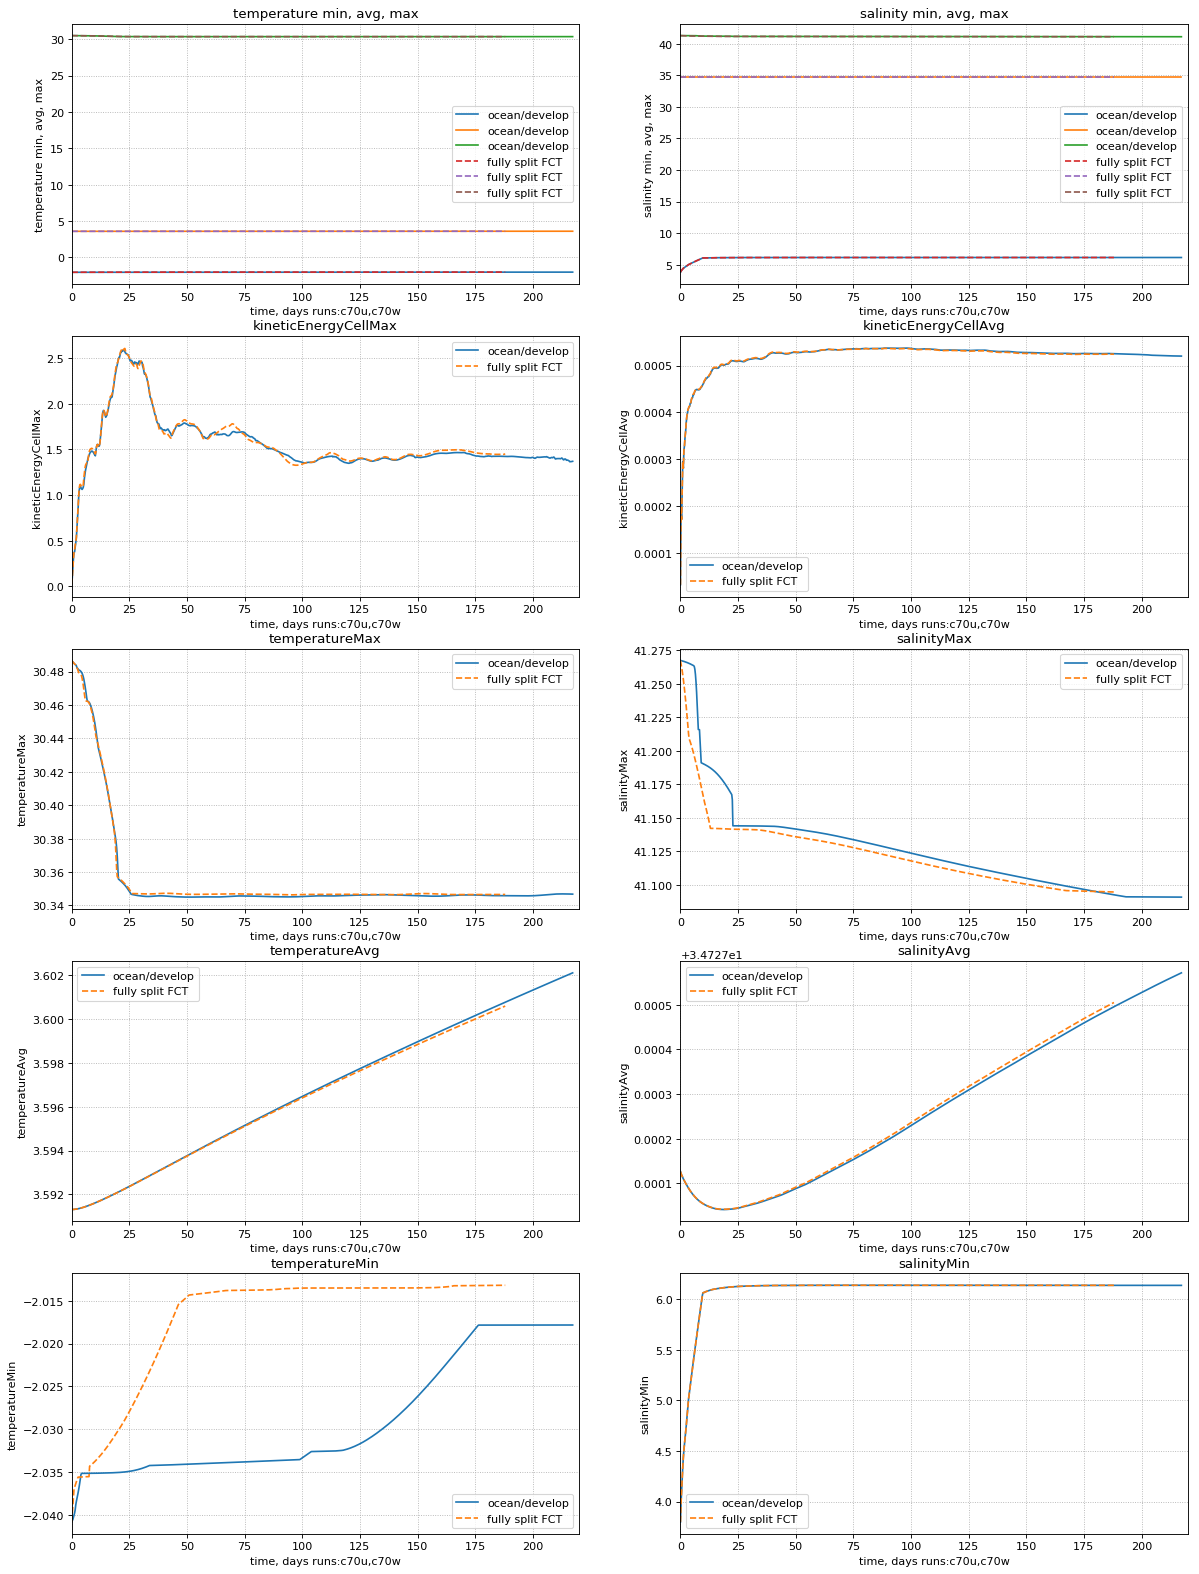

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

# open the first netCDF file for reading.
filePathName = wd + '/' + dirName1 + '/' + fileName
print 'Reading data from: ' + filePathName
ncfile1 = Dataset(filePathName,'r') 
t1 = ncfile1.variables['daysSinceStartOfSim']

# open the second netCDF file for reading.
filePathName = wd + '/' + dirName2 + '/' + fileName
print 'Reading data from: ' + filePathName
ncfile2 = Dataset(filePathName,'r') 
t2 = ncfile2.variables['daysSinceStartOfSim']

file_path = "/my/directory/filename.txt"
directory = os.path.dirname(file_path)

try:
    os.stat(outputDir)
except:
    os.mkdir(outputDir)  
    
iPlot=1
fig=plt.figure(figsize=(18, 25), dpi= 80)
plt.clf()
for var in varListMinMax:
   plt.subplot(5,2,iPlot)
   n=0
   dataMin = ncfile1.variables[var+'Min']
   dataMax = ncfile1.variables[var+'Max']
   dataAvg = ncfile1.variables[var+'Avg']
   plt.plot(t1, dataMin, lt[n], t1, dataAvg, lt[n], t1, dataMax, lt[n], label=legend1)
   n=1
   dataMin = ncfile2.variables[var+'Min']
   dataMax = ncfile2.variables[var+'Max']
   dataAvg = ncfile2.variables[var+'Avg']
   plt.plot(t2, dataMin, '--', t2, dataAvg, '--', t2, dataMax, '--', label=legend2)
   plt.xlabel(xLabel)
   plt.ylabel(var + ' min, avg, max')
   plt.title(titleText + var + ' min, avg, max')
   plt.grid(True,which="both",ls="dotted")
   plt.xlim([0,endTime])
   plt.legend()
   iPlot += 1

for var in varList:
   plt.subplot(5,2,iPlot)
   n=0
   data = ncfile1.variables[var]
   plt.plot(t1, data, lt[n], label=legend1)
   n=1
   data = ncfile2.variables[var]
   plt.plot(t2, data, '--', label=legend2)
   plt.xlabel(xLabel)
   plt.ylabel(var)
   plt.title(titleText + var)
   plt.xlim([0,endTime])
   plt.legend()
   plt.grid(True,which="both",ls="dotted")
   iPlot += 1

if writeOutput:
   outputFile = outputDir + '/' + dirName1 + '_' + dirName2 + '_global_stats.png'
   plt.savefig(outputFile)
   print 'Created plot: ' + outputFile

ncfile1.close()
ncfile2.close()